# 1. Linear Regression with OLS(Ordinary Least Square)
#### y = ax + b의 간단한 선형회귀식을 만들어 오차제곱합을 최소화하는 a와 b를 찾아봅시다

In [75]:
# 단순 선형 회귀를 위한 임의의 데이터셋을 생성합니다.
seed = 1215
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=1, noise=3.0, random_state=seed)

X_train = X[:800]
X_test = X[800:]
y_train = y[:800]
y_test = y[800:]

### 1-1. 다음과 같은 산점도(scatter plot)을 그려주세요

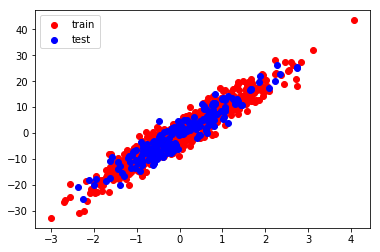

In [76]:
import matplotlib.pyplot as plt

# Your Code Here
plt.scatter(X_train,y_train, c="r")
plt.scatter(X_test,y_test, c="b")
plt.legend(["train", "test"])
plt.show()

### 1-2. h(x) = x+1 일때, train set(X_train, y_train)의 오차 제곱합 평균(Mean Square Error)을 구하세요

In [77]:
from datetime import datetime

def MSE(X_train, y_train):
    error = 0
# Your Code Here(for문을 이용해 짜보세요)
    for i, j in zip(X_train, y_train):
        error += (i + 1 - j) ** 2
    return error/len(y_train)

# seed가 같을 경우 MSE값은 같아야 합니다.
start = datetime.now()
print(MSE(X_train, y_train))
print(datetime.now()-start)

[90.55459607]
0:00:00.004984


### 1.3 h(x) = 2x 일 때, train set(X_train, y_train)의 오차 제곱합 평균(Mean Square Error)을 구하세요

In [78]:
import numpy as np
from datetime import datetime

y_train = y_train.reshape(800,1)

# Your Code Here(np.dot과 .T(transpose)를 이용해 짜보세요 MSE with vectorize)
def h(theta,X):
    return np.dot(X,theta)

def MSE(mytheta,X,y):
    # len(X)로 나눠도 되고 2*len(X)으로 나눠도 됩니다 엄격하게는 len(X)가 맞고 optimize 측면에서는 의미가 동일합니다
    return float((1./(len(X))) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

# seed가 같을 경우 MSE값은 같아야 합니다.
start = datetime.now()
print(MSE(2,X_train,y_train))
print(datetime.now()-start)

35.905558387581024
0:00:00.001000


### 1-4. sklearn.linear_model의 Linear Regression을 이용해 최적의 a,b를 찾으세요

y = 9.8012X + -0.1666
Mean Squared Error : 9.352834376815956
R^2 : 0.8995829250965823


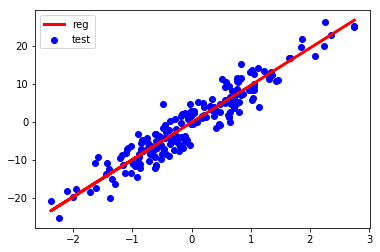

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Your Code Here(sklearn에서 LinearRegression 함수를 불러오고 X_train과 y_train에 적합시켜보세요)

model = LinearRegression()
model.fit(X_train, y_train)

# optimal a,b based on OLS
print("y = %.4fX + %.4f"%(float(model.coef_[0]),float(model.intercept_)))

# Your Code Here(X_test에 대해서 predict를 해보고 mse를 구해보세요)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# r2_score
r_square = r2_score(y_test, y_pred)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)

# Your Code Here (test set을 scatter plot으로 나타내고, 본인이 구한 선형회귀식을 다음과 같은 직선으로 나타내보세요)
plt.scatter(X_test, y_test, c="b")
plt.plot(X_test, y_pred, c="r", linewidth=3)
plt.legend(["reg","test"])
plt.show()

# 2. Linear Regression with Gradient Descent

![gradientdescent](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/Cost-Function.jpg)

### 2-1. h(x) = ax라는 식을 만들어 Gradient Descent를 이용해 mse를 최소화하는 a를 찾아보세요

In [106]:
iterations = 10000
learningrate = 0.01
y_test = y_test.reshape(200,1)

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    
    for meaningless in range(iterations):
        # Your Code Here 
        # (newtheta = theta-(learningrate/number of training examples)X derivative Loss with respect to theta)
        # Loss function을 theta에 대해 직접 미분해보세요(tip.Chain rule)
        theta = theta - (learningrate/len(X)*2)*np.sum((h(theta,X)-y)*X)
        
    y_pred = theta*X_test
    r_square = r2_score(y_test, y_pred)    
    
    return print('Optimal "a" is:', round(theta,3), '\n', 'R^2 :', round(r_square,3))

In [107]:
Gradientdescent(X_train,y_train, 5)

Optimal "a" is: 9.803 
 R^2 : 0.899


In [108]:
m = y_test.size
round(MSE(9.803, X_test, y_test),3)

4.713

### 2-2. 이번에는 같은 함수에서 iteration 전에 Loss(MSE)를 계산해보고 다음과 같은 plot으로 나타내보세요

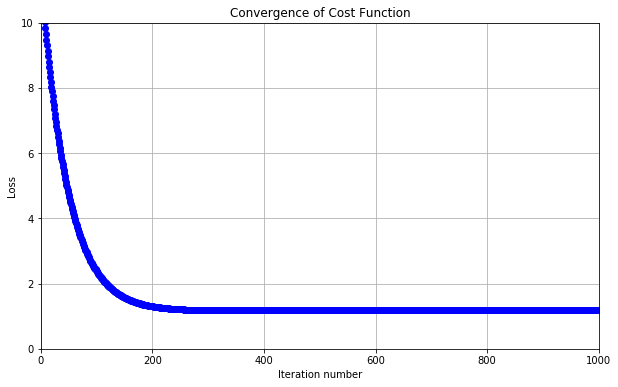

In [10]:
iterations = 10000
learningrate = 0.01

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    Loss = []
    for meaningless in range(iterations):
        # Your Code Here
        theta = theta - (learningrate/len(X))*np.sum((h(theta,X)-y)*X)
        Loss.append(MSE(theta, X_test, y_test))
    return Loss

Loss = Gradientdescent(X_train,y_train, 0)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.xlim([0,1000])
plt.ylim([0,10])
# Your Code Here
plt.plot(range(len(Loss)),Loss,'bo')


# 2. Logistic Regression

In [2]:
import sklearn.datasets
seed = 1215
X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative = 2, n_redundant = 0, n_repeated = 0,random_state = seed)

X_train = X[:800]
X_train = X_train[:,0]
X_test = X[800:]
X_test = X_test[:,0]
y_train = y[:800]
y_test = y[800:]

### 2-1. 다음과 같은 산점도를 그려주세요

In [3]:
import matplotlib.pyplot as plt

plt.legend(["train", "test"])
# Your Code Here
plt.scatter(X_train,y_train, c="r")
plt.scatter(X_test,y_test, c="b")

plt.show()

<Figure size 640x480 with 1 Axes>

### 2-2. 가중치가 1일 때 loss를 계산해보세요. h(x) = 1/1+e^-x 입니다
![logisticregression](https://i.stack.imgur.com/XbU4S.png)

In [4]:
def sigmoid(x, mytheta):
    try:
            output = 1 / (1 + np.exp(-mytheta*x))
    except:
            output = 0
    return output

In [6]:
import numpy as np
def LogisticLoss(X, y, mytheta):
    error0 = 0
    error1 = 0
# Your Code Here(for문을 이용해 짜보세요)
# try, except를 이용해 sigmoid와 같이 log값을 10 또는 -10으로 설정해주세요
    for i, j in zip(X, y):
        if j == 0:
                error0 -= np.log(1-sigmoid(i,mytheta)+0.000001)
        elif j == 1:
                error1 -= np.log(sigmoid(i,mytheta)+0.000001)
    return (error0 + error1) / len(y)

# seed가 같을 경우 LogisticLoss값은 같아야 합니다.
print(LogisticLoss(X_train, y_train, 1))

0.8309437805013792


### 2-3. Gradient Descent 기반으로 주어진 loss를 최소화하는 weight를 찾아보세요.

In [7]:
import numpy as np

iterations = 10000
learningrate = 0.01

# 초기값은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    for meaningless in range(iterations):
        # Your Code Here
        # Cross Entropy Loss를 theta에 대해 미분하면 됩니다.
        # https://www.youtube.com/watch?v=mLth3-4yn4Q 이곳의 동영상을 참고하세요
        theta = theta - (learningrate/len(X))*np.sum((sigmoid(X,theta)-y)*X)
        # Vectorize version
        # theta = theta - (learningrate/len(X))*(-X.T.dot((y-sigmoid(X,theta))))
    
    LogisticLoss(X_test, y_test, theta)
    return print('Optimal "a" is:', round(theta,3), '\n','Logistic Loss :', round(LogisticLoss(X_test, y_test, theta),3))

In [8]:
Gradientdescent(X_train,y_train,100)

Optimal "a" is: 49.106 
 Logistic Loss : 3.301


### 2-4. Loss의 변화를 plot으로 나타내보세요.

In [165]:
iterations = 10000
learningrate = 0.1

# 초기값은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    loss = []
    thetahistory = []
    for meaningless in range(iterations):
        #Your Code Here
        theta = theta - (learningrate/len(X))*np.sum((sigmoid(X,theta)-y)*X)
        # Vectorize version
        # theta = theta - (learningrate/len(X))*(-X.T.dot((y-sigmoid(X,theta))))
        temploss = LogisticLoss(X_test, y_test, theta)
        thetahistory.append(np.array(theta))
        loss.append(np.array(temploss))
    return loss, thetahistory

In [171]:
LLoss, thetaa= Gradientdescent(X_train, y_train, 5)

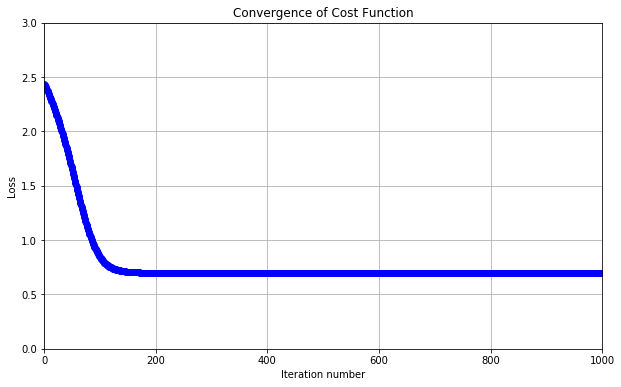

In [172]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.xlim([0,1000])
plt.ylim([0,3])
#Your Code Here
plt.plot(range(len(LLoss)),LLoss,'bo')

# 고생하셨습니다 :)